In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline
plt.style.use('ggplot')

In [2]:
pd.__version__

'0.16.2'

In [3]:
conservatory = pd.read_csv('cleaned_landsend_veg_2007_2012.csv')
ideal_species = pd.read_csv('ideal_species_mix.csv')

In [4]:
conservatory.head()

,site_year_code,transect,point,height,species,native_status,life_history,plant_code,stature
0,NUWO-2012,5,90,Low,NaN,NaN,NaN,NaN,NaN
1,NUWO-2012,13,150,Low,NaN,NaN,NaN,NaN,NaN
2,NMS-2010,8,20,Low,Achillea millefolium,Native,Perennial,ACMI,Forb
3,NMS-2010,24,4,Low,Achillea millefolium,Native,Perennial,ACMI,Forb
4,NMS-2010,48,16,Low,Achillea millefolium,Native,Perennial,ACMI,Forb


In [5]:
conservatory['Site'] = conservatory['site_year_code'].map(lambda x: x.split('-')[0])
conservatory['Year'] = conservatory['site_year_code'].map(lambda x: x.split('-')[1])
conservatory.drop('site_year_code', axis = 1, inplace = True)

In [6]:
conservatory.Year = conservatory.Year.astype('int')
conservatory = conservatory.loc[conservatory.Year < 2013]

In [7]:
def fix_heights(s):
    if s == 'L' or s == 'L ':
        return 'Low'
    elif s == 'M':
        return 'Medium'
    elif s == 'H':
        return 'High'
    return s

conservatory['height'] = conservatory['height '].map(fix_heights)
conservatory.drop('height ', axis = 1 ,inplace = True)

In [8]:
conservatory = conservatory.loc[pd.notnull(conservatory.species)]
conservatory.fillna('Unknown', inplace = True)

In [9]:
conservatory['species'] = conservatory['species'].map(lambda s: s.lower().strip())

In [10]:
conservatory.head()

,transect,point,species,native_status,life_history,plant_code,stature,Site,Year,height
2,8,20,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
3,24,4,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
4,48,16,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
5,60,16,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
6,20,11,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2011,Low


In [11]:
conservatory.loc[conservatory.Site == 'SUDO','Site'] = 'SUDU' 

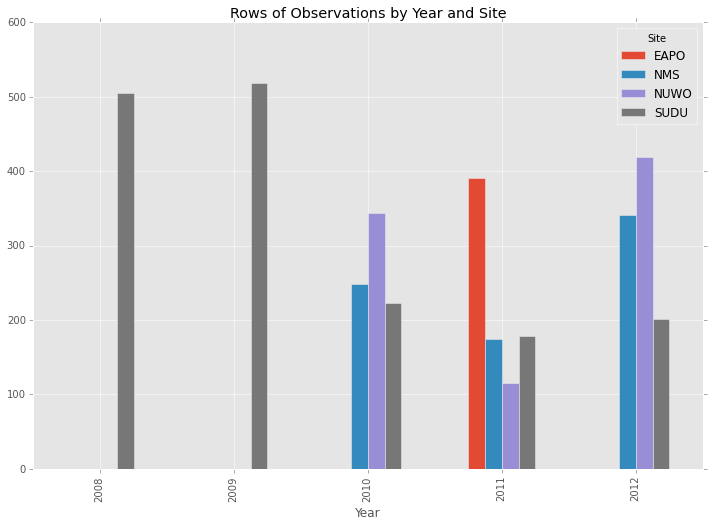

In [12]:
c_gb = conservatory.groupby(['Year','Site'])
t = c_gb.count()['transect']
t.unstack().plot(kind='bar', figsize = (12,8))
plt.title('Rows of Observations by Year and Site')

In [13]:
t.unstack().fillna(0)

Site,EAPO,NMS,NUWO,SUDU
Year,,,,
2008,0,0,0,505
2009,0,0,0,518
2010,0,249,344,223
2011,391,175,115,178
2012,0,341,419,202


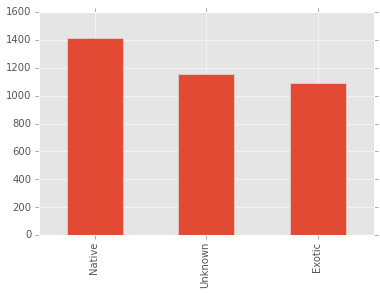

In [14]:
conservatory['native_status'].value_counts().plot(kind='bar')

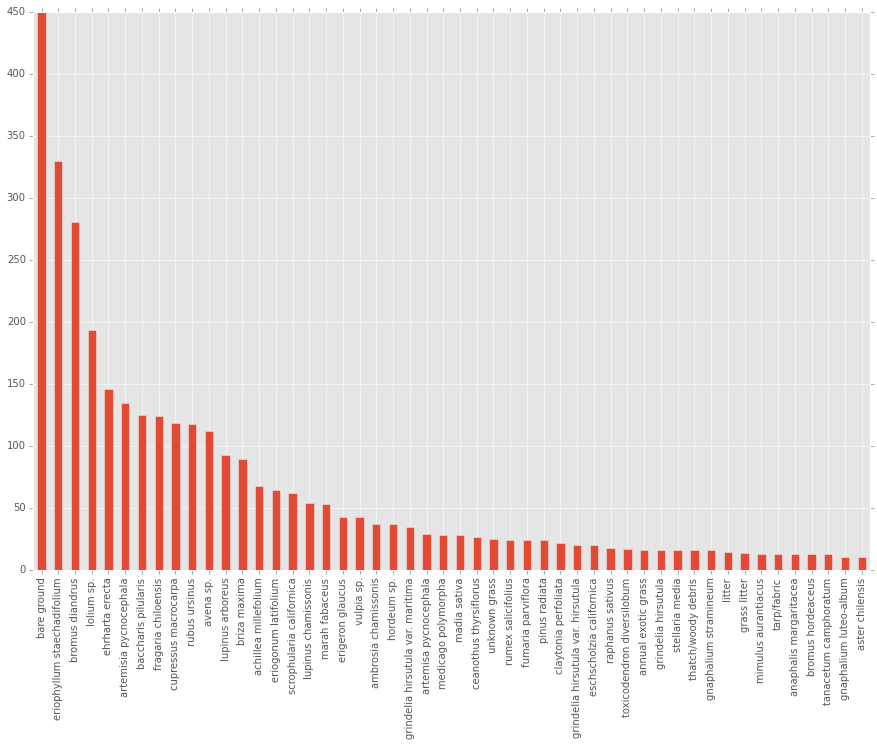

In [15]:
conservatory['species'].value_counts()[:50].plot(kind='bar', figsize = (15,10))
plt.show()

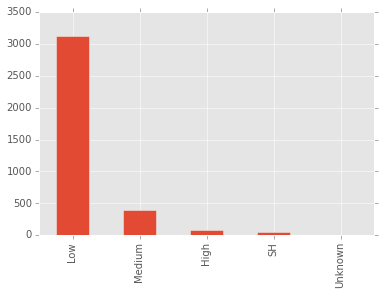

In [16]:
conservatory['height'].value_counts().plot(kind='bar')

In [17]:
#c = conservatory.set_index(['Year','Site','transect','point'])
#c.head()

In [18]:
conservatory.head()

,transect,point,species,native_status,life_history,plant_code,stature,Site,Year,height
2,8,20,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
3,24,4,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
4,48,16,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
5,60,16,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low
6,20,11,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2011,Low


In [19]:
def join_text(s):
    return ', '.join(s)

In [20]:
c = conservatory.groupby(['Year','Site']).agg({'species':[join_text],'native_status':[join_text],'height':[join_text], 'transect': [np.count_nonzero]})

In [21]:
c

height  \
                                                   join_text   
Year Site                                                      
2008 SUDU  Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
2009 SUDU  Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
2010 NMS   Low, Low, Low, Low, Medium, Low, Low, Low, Low...   
     NUWO  Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
     SUDU  Low, Medium, Low, Low, Low, Low, Low, Medium, ...   
2011 EAPO  Low, Low, Low, Medium, Low, Medium, Medium, Lo...   
     NMS   Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
     NUWO  Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
     SUDU  Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
2012 NMS   Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
     NUWO  Low, Low, Low, Low, Low, Low, Low, Low, Low, L...   
     SUDU  Low, Low, Low, Low, Low, Low, Low, Medium, Low...   

                                                     species      transect  \
                                                   join_text count_nonzero   
Year Site                                                                    
2008 SUDU  artemisia californica, baccharis pilularis, ba...           505   
2009 SUDU  armeria maritima, armeria maritima, artemisia ...           518   
2010 NMS   achillea millefolium, achillea millefolium, ac...           248   
     NUWO  achillea millefolium, achillea millefolium, an...           344   
     SUDU  achillea millefolium, achillea millefolium, ac...           211   
2011 EAPO  avena sp., avena sp., avena sp., avena sp., av...           373   
     NMS   achillea millefolium, achillea millefolium, ac...           168   
     NUWO  erigeron glaucus, eriogonum latifolium, fragar...           115   
     SUDU  achillea millefolium, achillea millefolium, ac...           178   
2012 NMS   achillea millefolium, achillea millefolium, ac...           341   
     NUWO  achillea millefolium, achillea millefolium, ac...           419   
     SUDU  achillea millefolium, achillea millefolium, ac...           202   

                                               native_status  
                                                   join_text  
Year Site                                                     
2008 SUDU  Unknown, Native, Native, Native, Native, Nativ...  
2009 SUDU  Native, Native, Native, Native, Native, Native...  
2010 NMS   Native, Native, Native, Native, Native, Exotic...  
     NUWO  Native, Native, Unknown, Unknown, Unknown, Unk...  
     SUDU  Native, Native, Native, Native, Native, Exotic...  
2011 EAPO  Exotic, Exotic, Exotic, Exotic, Exotic, Exotic...  
     NMS   Native, Native, Native, Native, Native, Native...  
     NUWO  Native, Native, Native, Exotic, Exotic, Exotic...  
     SUDU  Native, Native, Native, Native, Unknown, Nativ...  
2012 NMS   Native, Native, Native, Native, Native, Native...  
     NUWO  Native, Native, Native, Native, Native, Unknow...  
     SUDU  Native, Native, Native, Native, Native, Native...

In [22]:
c.index

MultiIndex(levels=[[2008, 2009, 2010, 2011, 2012], [u'EAPO', u'NMS', u'NUWO', u'SUDU']],
           labels=[[0, 1, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4], [3, 3, 1, 2, 3, 0, 1, 2, 3, 1, 2, 3]],
           names=[u'Year', u'Site'])

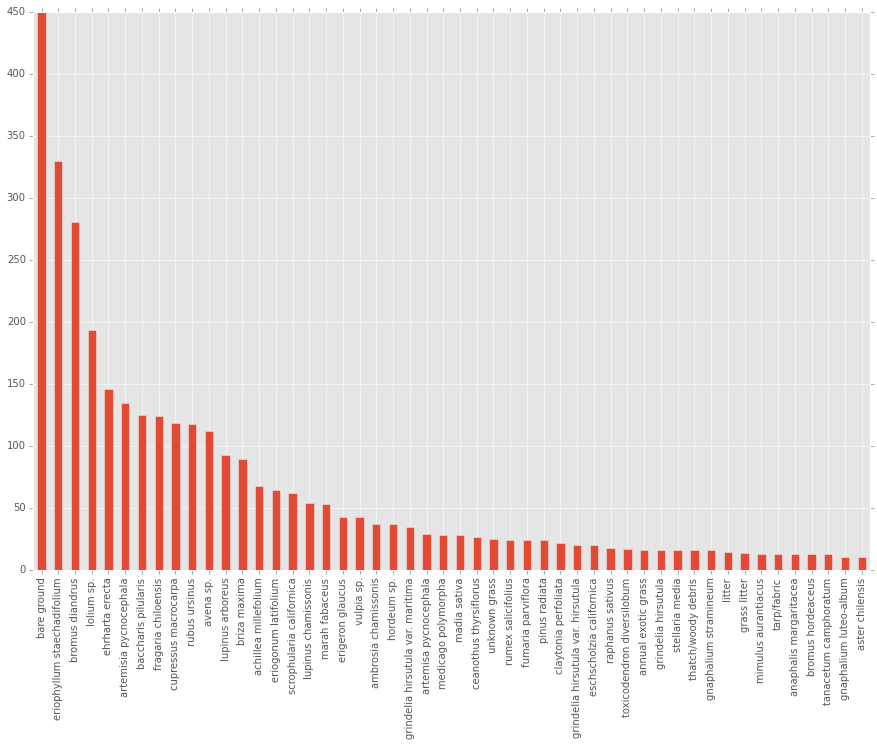

In [23]:
conservatory.species.value_counts()[:50].plot(kind = 'bar', figsize = (15,10))

In [24]:
species = set(ideal_species.Species)

In [25]:
conservatory['obs'] = 1

In [26]:
conservatory.head()

,transect,point,species,native_status,life_history,plant_code,stature,Site,Year,height,obs
2,8,20,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low,1
3,24,4,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low,1
4,48,16,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low,1
5,60,16,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2010,Low,1
6,20,11,achillea millefolium,Native,Perennial,ACMI,Forb,NMS,2011,Low,1


In [27]:
top_50_species = conservatory.species.value_counts()[:50]
top_50_species.index

Index([u'bare ground', u'eriophyllum staechadifolium', u'bromus diandrus',
       u'lolium sp.', u'ehrharta erecta', u'artemisia pycnocephala',
       u'baccharis pilularis', u'fragaria chiloensis', u'cupressus macrocarpa',
       u'rubus ursinus', u'avena sp.', u'lupinus arboreus', u'briza maxima',
       u'achillea millefolium', u'eriogonum latifolium',
       u'scrophularia californica', u'lupinus chamissonis', u'marah fabaceus',
       u'erigeron glaucus', u'vulpia sp.', u'ambrosia chamissonis',
       u'hordeum sp.', u'grindelia hirsutula var. maritima',
       u'artemisa pycnocephala', u'medicago polymorpha', u'madia sativa',
       u'ceanothus thyrsiflorus', u'unknown grass', u'rumex salicifolius',
       u'fumaria parviflora', u'pinus radiata', u'claytonia perfoliata',
       u'grindelia hirsutula var. hirsutula', u'eschscholzia californica',
       u'raphanus sativus', u'toxicodendron diversilobum',
       u'annual exotic grass', u'grindelia hirsutula', u'stellaria media',
   

In [28]:
conservatory.Year = conservatory.Year.astype('str')

In [29]:
conservatory_subset = conservatory.loc[conservatory.species.isin(top_50_species.index)]

In [30]:
c = conservatory_subset.groupby(['Year','Site','species']).agg({'obs':np.count_nonzero})

In [31]:
c = c.unstack().fillna(0)

In [32]:
c.columns = c.columns.droplevel()

In [33]:
c.head()

species    achillea millefolium  ambrosia chamissonis  anaphalis margaritacea  \
Year Site                                                                       
2008 SUDU                    12                    14                       0   
2009 SUDU                    10                    11                       0   
2010 NMS                      5                     0                       4   
     NUWO                     2                     0                       0   
     SUDU                     5                     7                       0   

species    annual exotic grass  artemisa pycnocephala  artemisia pycnocephala  \
Year Site                                                                       
2008 SUDU                    0                      0                      67   
2009 SUDU                    0                      0                      40   
2010 NMS                     0                      0                       0   
     NUWO                    1                      0                       2   
     SUDU                    0                     29                       0   

species    aster chilensis  avena sp.  baccharis pilularis  bare ground  \
Year Site                                                                 
2008 SUDU                0          0                   15          152   
2009 SUDU                0          0                   16          140   
2010 NMS                 2         38                   10           39   
     NUWO                2         34                    1            9   
     SUDU                0          3                    6           14   

species       ...      rubus ursinus  rumex salicifolius  \
Year Site     ...                                          
2008 SUDU     ...                  1                   8   
2009 SUDU     ...                  5                   4   
2010 NMS      ...                  2                   1   
     NUWO     ...                  4                   0   
     SUDU     ...                  1                   4   

species    scrophularia californica  stellaria media  tanacetum camphoratum  \
Year Site                                                                     
2008 SUDU                         0                0                      5   
2009 SUDU                         2                0                      2   
2010 NMS                          6                0                      0   
     NUWO                         3                1                      0   
     SUDU                         1                0                      2   

species    tarp/fabric  thatch/woody debris  toxicodendron diversilobum  \
Year Site                                                                 
2008 SUDU            1                   15                           0   
2009 SUDU           12                    1                           0   
2010 NMS             0                    0                           0   
     NUWO            0                    0                           0   
     SUDU            0                    0                           0   

species    unknown grass  vulpia sp.  
Year Site                             
2008 SUDU             22           0  
2009 SUDU              3           0  
2010 NMS               0           0  
     NUWO              0           4  
     SUDU              0           0  

[5 rows x 50 columns]

In [34]:
c.shape

(12, 50)

In [35]:
c = c.T

In [36]:
#c.reset_index(inplace = True)

In [37]:
c.head()

Year                   2008 2009 2010           2011               2012       \
Site                   SUDU SUDU  NMS NUWO SUDU EAPO NMS NUWO SUDU  NMS NUWO   
species                                                                        
achillea millefolium     12   10    5    2    5    0   5    0    4   15    5   
ambrosia chamissonis     14   11    0    0    7    0   0    0    1    0    0   
anaphalis margaritacea    0    0    4    0    0    0   1    0    0    8    0   
annual exotic grass       0    0    0    1    0    0   0    0    0    4   11   
artemisa pycnocephala     0    0    0    0   29    0   0    0    0    0    0   

Year                         
Site                   SUDU  
species                      
achillea millefolium      5  
ambrosia chamissonis      4  
anaphalis margaritacea    0  
annual exotic grass       0  
artemisa pycnocephala     0

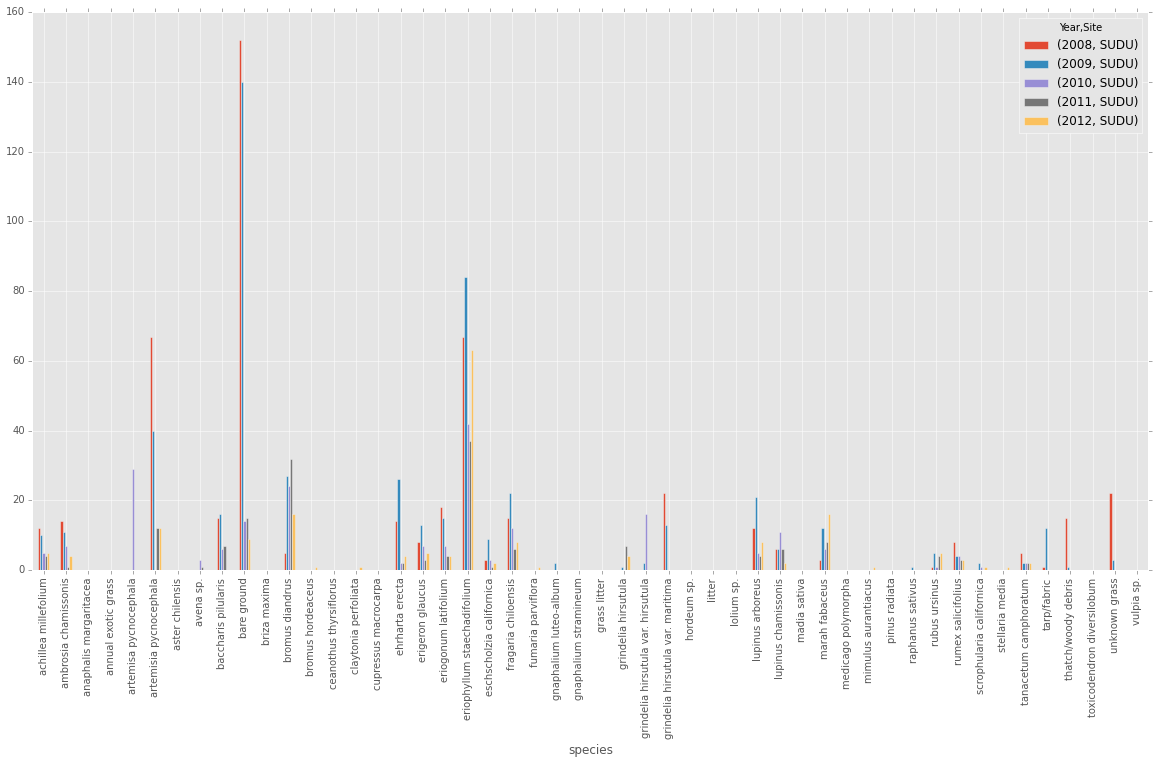

In [38]:
c.iloc[:,[0,1,4,8,11]].plot(kind = 'bar', figsize = (20,10))

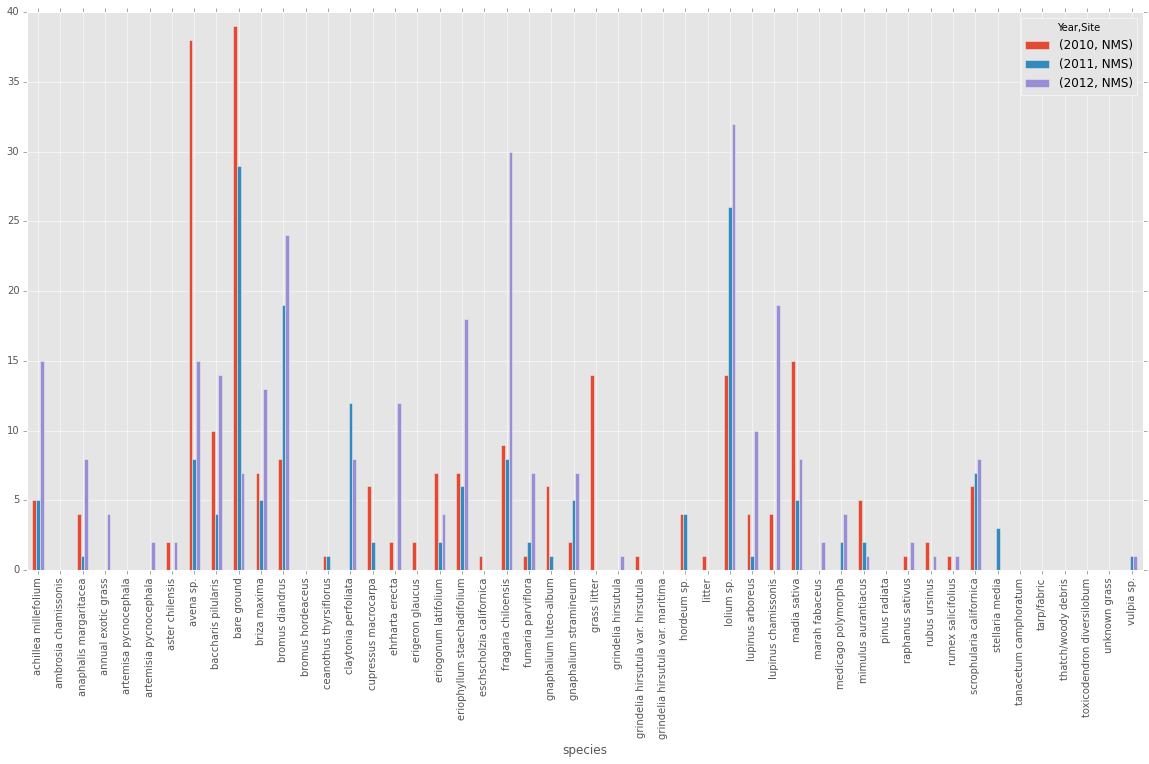

In [39]:
c.iloc[:,[2,6,9]].plot(kind = 'bar', figsize = (20,10))

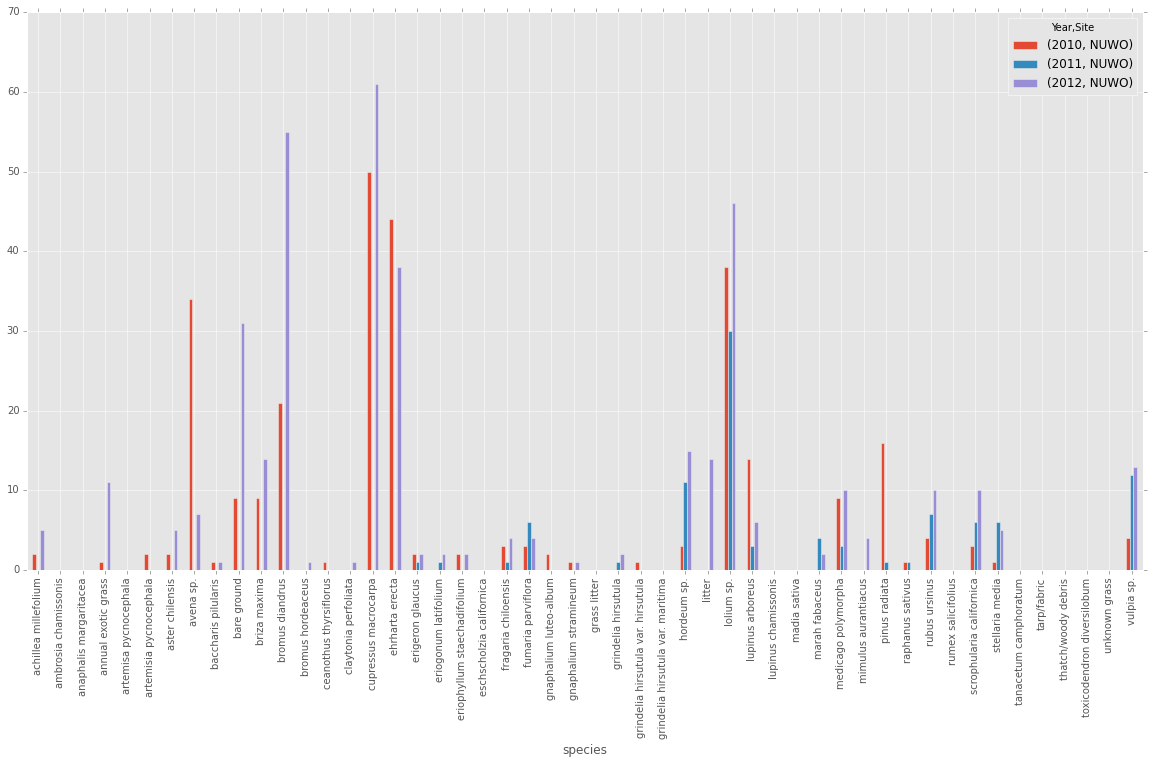

In [40]:
c.iloc[:,[3,7,10]].plot(kind = 'bar', figsize = (20,10))

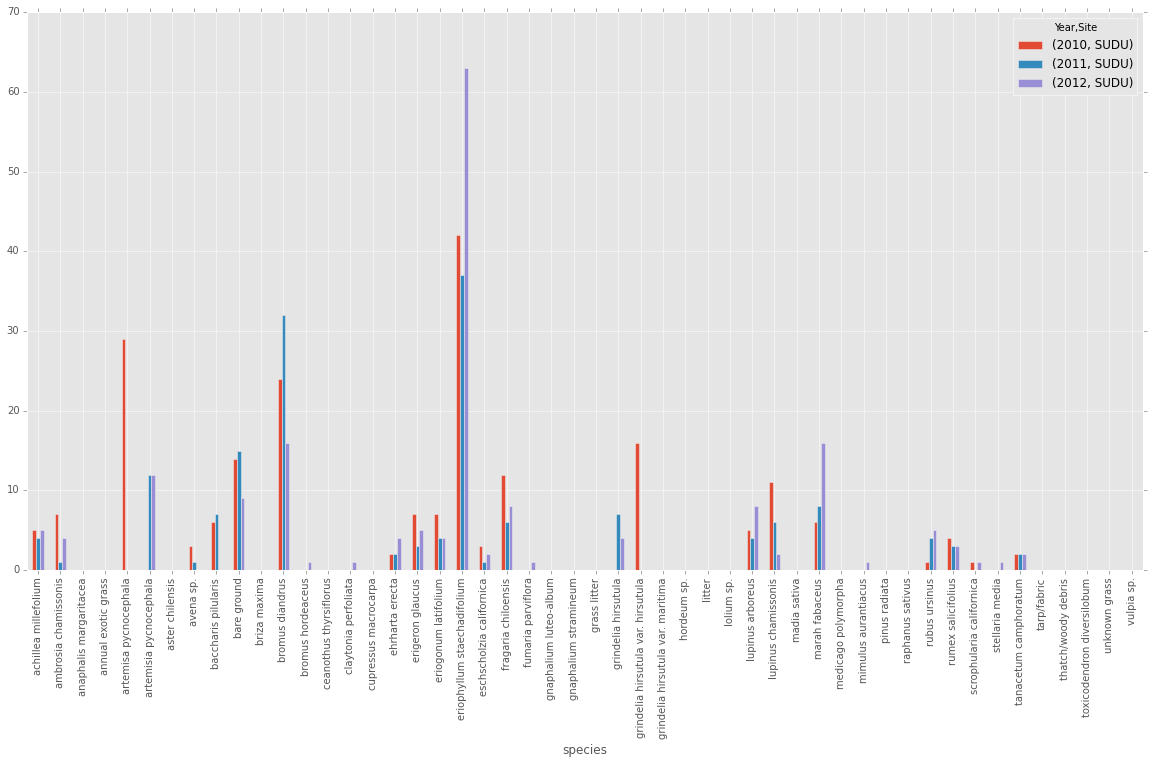

In [41]:
c.iloc[:,[4,8,11]].plot(kind = 'bar', figsize = (20,10))

In [42]:
ideal_species['Genus'] = ideal_species.Species.map(lambda s: s.split()[0].lower())

In [43]:
ideal_species.Species = ideal_species.Species.map(lambda s: s.lower())

In [44]:
ideal_species

,Species,Percentage,Genus
0,ericameria ericoides,0.15,ericameria
1,armeria maritima,0.11,armeria
2,poa douglasii,0.11,poa
3,castilleja affinis,0.10,castilleja
4,artemisia pycnocephala,0.06,artemisia
5,dudleya farinosa,0.05,dudleya
6,erigeron glaucus,0.05,erigeron
7,eriogonum latifolium,0.05,eriogonum
8,eriophyllum staechadifolium,0.05,eriophyllum
9,fragaria chiloensis,0.05,fragaria


In [45]:
ideal_species.Species

0            ericameria ericoides
1                armeria maritima
2                   poa douglasii
3              castilleja affinis
4          artemisia pycnocephala
5                dudleya farinosa
6                erigeron glaucus
7            eriogonum latifolium
8     eriophyllum staechadifolium
9             fragaria chiloensis
10                lotus scoparius
11            lupinus chamissonis
12           polygonum paronychia
13         tanacetum camphoratum 
14            baccharis pilularis
15     camissonia cheiranthifolia
Name: Species, dtype: object

In [46]:
conservatory['genus'] = conservatory.species.map(lambda s: s.split()[0])

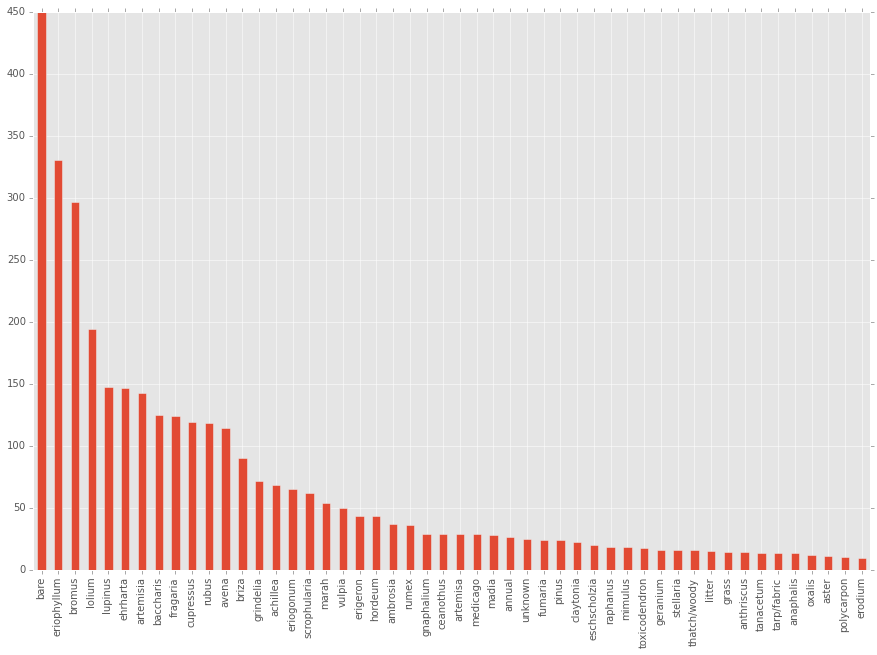

In [47]:
conservatory.genus.value_counts()[:50].plot(kind='bar', figsize = (15,10))

In [48]:
ideal_species

,Species,Percentage,Genus
0,ericameria ericoides,0.15,ericameria
1,armeria maritima,0.11,armeria
2,poa douglasii,0.11,poa
3,castilleja affinis,0.10,castilleja
4,artemisia pycnocephala,0.06,artemisia
5,dudleya farinosa,0.05,dudleya
6,erigeron glaucus,0.05,erigeron
7,eriogonum latifolium,0.05,eriogonum
8,eriophyllum staechadifolium,0.05,eriophyllum
9,fragaria chiloensis,0.05,fragaria


In [49]:
#conservatory.genus.value_counts()[:50]

In [50]:
observation_counts = conservatory.groupby(['Year','Site','transect','point']).count()

In [51]:
observation_counts = observation_counts[['obs']]

In [52]:
observation_counts.reset_index(inplace = True)

In [53]:
observation_counts = observation_counts.groupby(['Year','Site']).count()

In [54]:
observation_counts[['obs']].unstack().fillna(0)

obs               
Site EAPO  NMS NUWO SUDU
Year                    
2008    0    0    0  498
2009    0    0    0  494
2010    0  149  146  111
2011  130  123   85   92
2012    0  110  152   92

In [55]:
test = conservatory.set_index(['Site','Year','point'])

In [56]:
test.sort_index()

transect                      species native_status  \
Site Year point                                                        
EAPO 2011 0             0                    avena sp.        Exotic   
          0             8                  bare ground       Unknown   
          0            12                  bare ground       Unknown   
          0            20                  bare ground       Unknown   
          0            52              bromus diandrus        Exotic   
          0            64              bromus diandrus        Exotic   
          0            28            bromus hordeaceus       Unknown   
          0            52            bromus hordeaceus       Unknown   
          0            60         eriogonum latifolium        Native   
          0             4                   lolium sp.        Exotic   
          0            52                   lolium sp.        Exotic   
          0             0             raphanus sativus        Exotic   
          0             4                rubus ursinus        Native   
          0            64                rubus ursinus        Native   
          0            64     scrophularia californica        Native   
          0            16                   vulpia sp.       Unknown   
          4            48          baccharis pilularis        Native   
          4            52          baccharis pilularis        Native   
          4            60          baccharis pilularis        Native   
          4            20                 briza maxima        Exotic   
          4            44                 briza maxima        Exotic   
          4            12              bromus diandrus        Exotic   
          4            24              bromus diandrus        Exotic   
          4            24              bromus diandrus        Exotic   
          4            28              bromus diandrus        Exotic   
          4            28              bromus diandrus        Exotic   
          4            36              bromus diandrus        Exotic   
          4            48              bromus diandrus        Exotic   
          4            60              bromus diandrus        Exotic   
          4            64              bromus diandrus        Exotic   
...                   ...                          ...           ...   
SUDU 2012 49           49  eriophyllum staechadifolium        Native   
          49           70  eriophyllum staechadifolium        Native   
          49           70  eriophyllum staechadifolium        Native   
          49           21          grindelia hirsutula        Native   
          49           35          grindelia hirsutula        Native   
          49           56          grindelia hirsutula        Native   
          49           42             lupinus arboreus        Native   
          49           63               marah fabaceus       Unknown   
          49           70               marah fabaceus       Unknown   
          49           63                rubus ursinus        Native   
          49           63                rubus ursinus        Native   
          49           70                rubus ursinus        Native   
          49           21         baccharius pilularis       Unknown   
          49           28         baccharius pilularis       Unknown   
          56           21         achillea millefolium        Native   
          56           35           castilleja affinis       Unknown   
          56           28          fragaria chiloensis        Native   
          56           14             lupinus arboreus        Native   
          56           63             lupinus arboreus        Native   
          56           63             lupinus arboreus        Native   
          56           63               marah fabaceus       Unknown   
          56           28         baccharius pilularis       Unknown   
          56           35         baccharius pilularis   

In [57]:
c = conservatory.groupby(['Year','Site']).agg({'species':[join_text],'native_status':[join_text],'height':[join_text], 'transect': [np.count_nonzero]})

In [58]:
c.columns = c.columns.droplevel(1)

In [59]:
c.height = c.height.map(lambda s: Counter(s.split()))

In [60]:
c.native_status = c.native_status.map(lambda s: Counter(s.split()))

In [61]:
c.species = c.species.map(lambda s: Counter(s.split()).most_common(20))

In [62]:
c

height  \
Year Site                                                      
2008 SUDU                          {u'Low,': 504, u'Low': 1}   
2009 SUDU                          {u'Low,': 517, u'Low': 1}   
2010 NMS   {u'Low,': 197, u'Medium,': 45, u'High,': 6, u'...   
     NUWO  {u'Low,': 246, u'Medium,': 35, u'High,': 62, u...   
     SUDU          {u'Low,': 168, u'Medium,': 54, u'Low': 1}   
2011 EAPO  {u'Low,': 280, u'Medium,': 106, u'High,': 4, u...   
     NMS   {u'Low,': 162, u'Medium,': 9, u'High,': 2, u'U...   
     NUWO  {u'SH,': 1, u'Low,': 108, u'Medium,': 5, u'Low...   
     SUDU       {u'Low,': 142, u'Medium': 1, u'Medium,': 35}   
2012 NMS           {u'Low,': 300, u'Medium,': 40, u'Low': 1}   
     NUWO  {u'SH,': 53, u'Low,': 343, u'Medium,': 19, u'H...   
     SUDU          {u'Low,': 150, u'Medium,': 51, u'Low': 1}   

                                                     species  transect  \
Year Site                                                                
2008 SUDU  [(bare, 152), (ground,, 152), (artemisia, 68),...       505   
2009 SUDU  [(bare, 140), (ground,, 140), (staechadifolium...       518   
2010 NMS   [(sp.,, 57), (bare, 39), (ground,, 39), (avena...       248   
     NUWO  [(sp.,, 79), (macrocarpa,, 50), (cupressus, 50...       344   
     SUDU  [(eriophyllum, 42), (staechadifolium,, 42), (p...       211   
2011 EAPO  [(rubus, 78), (ursinus,, 78), (bromus, 61), (b...       373   
     NMS   [(sp.,, 39), (bare, 29), (ground,, 29), (loliu...       168   
     NUWO  [(sp.,, 56), (lolium, 30), (vulpia, 16), (hord...       115   
     SUDU  [(staechadifolium,, 37), (eriophyllum, 37), (d...       178   
2012 NMS   [(sp.,, 50), (lolium, 32), (chiloensis,, 30), ...       341   
     NUWO  [(sp.,, 87), (macrocarpa,, 61), (cupressus, 61...       419   
     SUDU  [(staechadifolium,, 63), (eriophyllum, 63), (b...       202   

                                               native_status  
Year Site                                                     
2008 SUDU  {u'Native,': 172, u'Exotic,': 19, u'Unknown,':...  
2009 SUDU  {u'Native,': 250, u'Exotic,': 57, u'Unknown,':...  
2010 NMS   {u'Native,': 92, u'Exotic,': 101, u'Exotic': 1...  
     NUWO  {u'Native,': 46, u'Exotic,': 232, u'Unknown,':...  
     SUDU  {u'Native,': 165, u'Exotic,': 32, u'Unknown,':...  
2011 EAPO  {u'Native,': 186, u'Exotic,': 123, u'Unknown,'...  
     NMS   {u'Native,': 48, u'Exotic,': 68, u'Unknown,': ...  
     NUWO  {u'Native,': 21, u'Exotic,': 55, u'Unknown,': ...  
     SUDU  {u'Native,': 99, u'Exotic,': 37, u'Unknown,': ...  
2012 NMS   {u'Native,': 150, u'Exotic,': 119, u'Unknown,'...  
     NUWO  {u'Native,': 56, u'Exotic,': 241, u'Unknown,':...  
     SUDU  {u'Native,': 125, u'Exotic,': 6, u'Unknown,': ...

In [63]:
c

height  \
Year Site                                                      
2008 SUDU                          {u'Low,': 504, u'Low': 1}   
2009 SUDU                          {u'Low,': 517, u'Low': 1}   
2010 NMS   {u'Low,': 197, u'Medium,': 45, u'High,': 6, u'...   
     NUWO  {u'Low,': 246, u'Medium,': 35, u'High,': 62, u...   
     SUDU          {u'Low,': 168, u'Medium,': 54, u'Low': 1}   
2011 EAPO  {u'Low,': 280, u'Medium,': 106, u'High,': 4, u...   
     NMS   {u'Low,': 162, u'Medium,': 9, u'High,': 2, u'U...   
     NUWO  {u'SH,': 1, u'Low,': 108, u'Medium,': 5, u'Low...   
     SUDU       {u'Low,': 142, u'Medium': 1, u'Medium,': 35}   
2012 NMS           {u'Low,': 300, u'Medium,': 40, u'Low': 1}   
     NUWO  {u'SH,': 53, u'Low,': 343, u'Medium,': 19, u'H...   
     SUDU          {u'Low,': 150, u'Medium,': 51, u'Low': 1}   

                                                     species  transect  \
Year Site                                                                
2008 SUDU  [(bare, 152), (ground,, 152), (artemisia, 68),...       505   
2009 SUDU  [(bare, 140), (ground,, 140), (staechadifolium...       518   
2010 NMS   [(sp.,, 57), (bare, 39), (ground,, 39), (avena...       248   
     NUWO  [(sp.,, 79), (macrocarpa,, 50), (cupressus, 50...       344   
     SUDU  [(eriophyllum, 42), (staechadifolium,, 42), (p...       211   
2011 EAPO  [(rubus, 78), (ursinus,, 78), (bromus, 61), (b...       373   
     NMS   [(sp.,, 39), (bare, 29), (ground,, 29), (loliu...       168   
     NUWO  [(sp.,, 56), (lolium, 30), (vulpia, 16), (hord...       115   
     SUDU  [(staechadifolium,, 37), (eriophyllum, 37), (d...       178   
2012 NMS   [(sp.,, 50), (lolium, 32), (chiloensis,, 30), ...       341   
     NUWO  [(sp.,, 87), (macrocarpa,, 61), (cupressus, 61...       419   
     SUDU  [(staechadifolium,, 63), (eriophyllum, 63), (b...       202   

                                               native_status  
Year Site                                                     
2008 SUDU  {u'Native,': 172, u'Exotic,': 19, u'Unknown,':...  
2009 SUDU  {u'Native,': 250, u'Exotic,': 57, u'Unknown,':...  
2010 NMS   {u'Native,': 92, u'Exotic,': 101, u'Exotic': 1...  
     NUWO  {u'Native,': 46, u'Exotic,': 232, u'Unknown,':...  
     SUDU  {u'Native,': 165, u'Exotic,': 32, u'Unknown,':...  
2011 EAPO  {u'Native,': 186, u'Exotic,': 123, u'Unknown,'...  
     NMS   {u'Native,': 48, u'Exotic,': 68, u'Unknown,': ...  
     NUWO  {u'Native,': 21, u'Exotic,': 55, u'Unknown,': ...  
     SUDU  {u'Native,': 99, u'Exotic,': 37, u'Unknown,': ...  
2012 NMS   {u'Native,': 150, u'Exotic,': 119, u'Unknown,'...  
     NUWO  {u'Native,': 56, u'Exotic,': 241, u'Unknown,':...  
     SUDU  {u'Native,': 125, u'Exotic,': 6, u'Unknown,': ...

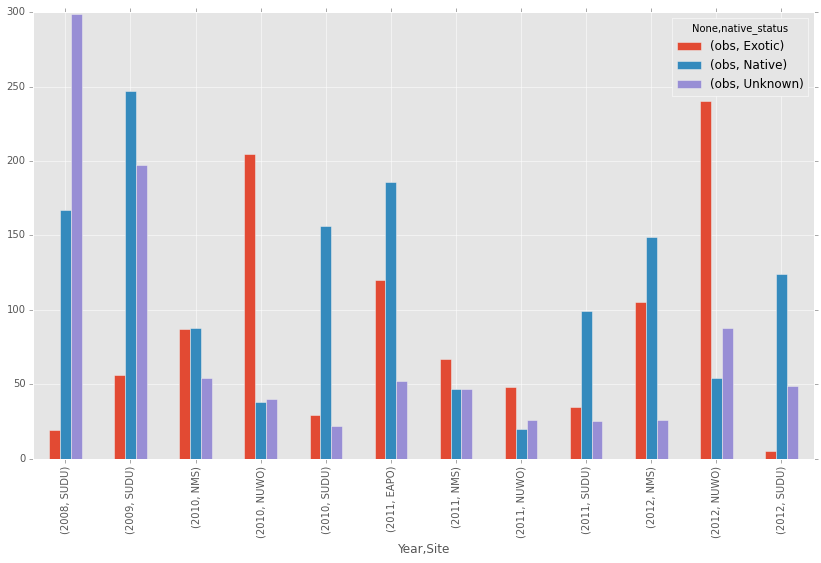

In [64]:
c = conservatory_subset.groupby(['Year','Site','native_status']).agg({'obs':np.count_nonzero})
c = c.unstack().fillna(0)
#c.sort_index(level = 1)

c.plot(kind = 'bar', figsize = (14,8))

In [65]:
# #Should remove Trash ##TRash is considered low
# c = conservatory_subset.groupby(['Year','Site','height']).agg({'obs':np.count_nonzero})
# c = c.unstack().fillna(0)
# #c.sort_index(by='Site')

# c.plot(kind = 'bar', figsize = (14,8))

In [66]:
conservatory.sample(50)

,transect,point,species,native_status,life_history,plant_code,stature,Site,Year,height,obs,genus
206,28.0,8,avena sp.,Exotic,Annual,AVSP,Grass,NMS,2010,Low,1,avena
1373,1.0,160,ehrharta erecta,Exotic,Perennial,EHER,Grass,NUWO,2012,Low,1,ehrharta
111,16.0,4,artemisia californica,Unknown,Unknown,Unknown,Unknown,NMS,2012,Low,1,artemisia
2820,80.0,16,rubus ursinus,Native,Perennial,RUUR,Shrub,NMS,2010,Low,1,rubus
3160,7.0,15,abronia latifolia,Native,Perennial,ABLA,Forb,SUDU,2008,Low,1,abronia
2600,21.0,43,lupinus chamissonis,Native,Perennial,LUCH,Shrub,SUDU,2011,Medium,1,lupinus
2065,14.3,32,fumaria parviflora,Exotic,Annual,FUPA,Forb,NUWO,2011,Low,1,fumaria
2930,70.0,57,rubus ursinus,Native,Perennial,RUUR,Shrub,SUDU,2011,Low,1,rubus
973,36.0,4,bromus diandrus,Exotic,Annual,BRDI,Grass,EAPO,2011,Low,1,bromus
1081,70.0,36,bromus diandrus,Exotic,Annual,BRDI,Grass,SUDU,2011,Low,1,bromus
